In [26]:
import pandas as pd 
import os
import matplotlib.pyplot as plt

os.chdir("/Users/jacobrichards/Desktop/DS_DA_Projects/inference")
data = pd.read_csv("output.csv", na_values=["", "NA"])
data['group'] = 1
data['week'] = range(1, len(data) + 1)
data2 = pd.read_csv("output_2.csv", na_values=["", "NA"])
data2['group'] = 2
data2['week'] = range(1, len(data2) + 1)
data3 = pd.read_csv("output_3.csv", na_values=["", "NA"])
data3['group'] = 3
data3['week'] = range(1, len(data3) + 1)

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = [8, 6]  
plt.rcParams['figure.dpi'] = 100  

In [27]:
df = pd.concat([data, data2, data3], axis=0, ignore_index=True)
display(df)

,date_week,year,month,dayofyear,x1,x2,x1_adstock,x2_adstock,x1_adstock_saturated,x2_adstock_saturated,...,cs,cc,seasonality,event_1,event_2,intercept,epsilon,y,group,week
0,2018-04-02,2018,4,92,0.318580,0.000000,0.191273,0.000000,0.364917,0.000000,...,0.021487,-0.010744,0.005371,0.0,0.0,2.0,0.106260,3.984662,1,1
1,2018-04-09,2018,4,99,0.112388,0.000000,0.143987,0.000000,0.280268,0.000000,...,0.259165,-0.130704,0.064231,0.0,0.0,2.0,0.067198,3.762872,1,2
2,2018-04-16,2018,4,106,0.292400,0.000000,0.233150,0.000000,0.435205,0.000000,...,0.481904,-0.248773,0.116566,0.0,0.0,2.0,0.242042,4.466967,1,3
3,2018-04-23,2018,4,113,0.071399,0.000000,0.136127,0.000000,0.265721,0.000000,...,0.676865,-0.363245,0.156810,0.0,0.0,2.0,0.095631,3.864219,1,4
4,2018-04-30,2018,4,120,0.386745,0.000000,0.286650,0.000000,0.517779,0.000000,...,0.832810,-0.472462,0.180174,0.0,0.0,2.0,-0.118140,4.441625,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532,2021-08-02,2021,8,214,0.033024,0.000000,0.134125,0.089463,0.585391,0.382158,...,-0.879312,-0.859141,-0.869226,0.0,0.0,2.0,0.313255,5.734552,3,175
533,2021-08-09,2021,8,221,0.165615,0.863349,0.138607,0.279049,0.599929,0.849881,...,-0.967484,-0.791496,-0.879490,0.0,0.0,2.0,0.401690,6.795083,3,176
534,2021-08-16,2021,8,228,0.171882,0.000000,0.149647,0.223240,0.634095,0.763510,...,-0.999887,-0.712405,-0.856146,0.0,0.0,2.0,-0.075989,6.273792,3,177
535,2021-08-23,2021,8,235,0.280257,0.000000,0.168892,0.178592,0.688165,0.666079,...,-0.974654,-0.623010,-0.798832,0.0,0.0,2.0,0.129986,6.507702,3,178


x1 and x2 are marketing expendature on 2 different plantforms 

In [28]:
columns_to_keep = [
    "date_week",
    "y",
    "x1",
    "x2",
    "event_1",
    "event_2",
    "dayofyear",
    "group",
    "week"
]

data = df[columns_to_keep].copy()

data.head()

,date_week,y,x1,x2,event_1,event_2,dayofyear,group,week
0,2018-04-02,3.984662,0.318580,0.0,0.0,0.0,92,1,1
1,2018-04-09,3.762872,0.112388,0.0,0.0,0.0,99,1,2
2,2018-04-16,4.466967,0.292400,0.0,0.0,0.0,106,1,3
3,2018-04-23,3.864219,0.071399,0.0,0.0,0.0,113,1,4
4,2018-04-30,4.441625,0.386745,0.0,0.0,0.0,120,1,5


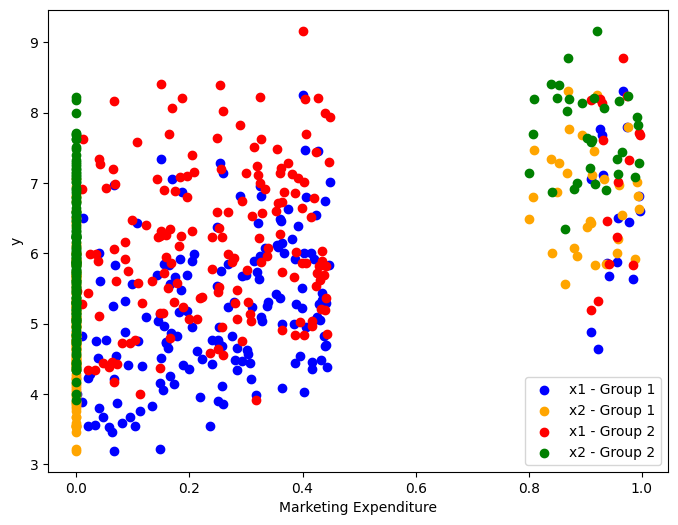

Sum of x2: 86.9134450527221


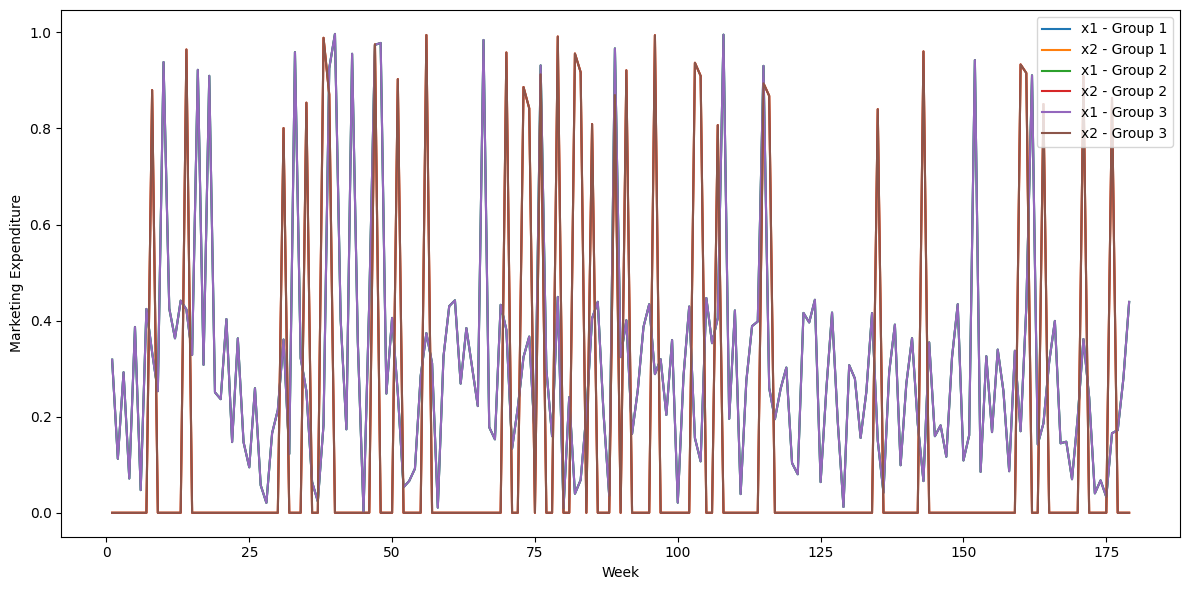

In [33]:
data_g1 = data[data['group'] == 1]
data_g2 = data[data['group'] == 2]

plt.scatter(data_g1['x1'], data_g1['y'], color='blue', label='x1 - Group 1')
plt.scatter(data_g1['x2'], data_g1['y'], color='orange', label='x2 - Group 1')
plt.scatter(data_g2['x1'], data_g2['y'], color='red', label='x1 - Group 2') 
plt.scatter(data_g2['x2'], data_g2['y'], color='green', label='x2 - Group 2')
plt.xlabel('Marketing Expenditure')
plt.ylabel('y')
plt.legend()
plt.show()
print(f"Sum of x2: {data['x2'].sum()}")

plt.figure(figsize=(12, 6))
for group in [1, 2, 3]:
    group_data = data[data['group'] == group]
    plt.plot(group_data['week'], group_data['x1'], label=f'x1 - Group {group}')
    plt.plot(group_data['week'], group_data['x2'], label=f'x2 - Group {group}')

plt.xlabel('Week')
plt.ylabel('Marketing Expenditure')
plt.legend()
plt.tight_layout()
plt.show()


